In [4]:
import numpy as np
import random as rand
from tqdm import tqdm
import matplotlib.pyplot as plt 

In [2]:
# ROCK = 0, PAPER = 1, SCISSORS = 2, 
NUM_ACTIONS = 3

In [3]:
class RPS_CFRM:
    def __init__(self, oppStrategy):
        self.oppStrategy = oppStrategy
        self.regretSum = np.zeros(NUM_ACTIONS)
        self.strategySum = np.zeros(NUM_ACTIONS)
    
    # get strat returns normalized regretSum or if all negative

    def get_strat(self):
        strategy = [i if i > 0 else 0 for i in self.regretSum]

        if sum(strategy) > 0:
            strategy = strategy/sum(strategy)
        else:
            strategy = np.ones(NUM_ACTIONS)/NUM_ACTIONS
        
        self.strategySum += strategy
        return strategy
    
    def get_actions(self):
        my_strat = self.get_strat()
        my_action =  np.random.choice(range(NUM_ACTIONS), p=my_strat)
        opp_action = np.random.choice(range(NUM_ACTIONS), p=self.oppStrategy)

        return my_action, opp_action
    
    # rock < paper < scissors < rock
    # 0 < 1 < 2 < 0
    def get_utility_array(self, opp_action):
        action_utilities = np.zeros(3)
        action_utilities[opp_action] = 0
        action_utilities[0 if opp_action == NUM_ACTIONS - 1 else opp_action + 1] = 1
        action_utilities[NUM_ACTIONS - 1 if opp_action == 0 else opp_action - 1] = -1

        return action_utilities
    
    def update_regrets(self, my_action, action_utilities):
        for i in range(NUM_ACTIONS):
            self.regretSum[i] += action_utilities[i] - action_utilities[my_action]

    def getAverageStrategy(self):
        avgStrategy = [i if i > 0 else 0 for i in self.strategySum]

        if sum(avgStrategy) > 0:
            avgStrategy = avgStrategy/sum(avgStrategy)
        else:
            avgStrategy = np.ones(NUM_ACTIONS)/NUM_ACTIONS
        
        return avgStrategy


In [13]:
x = []
ry = []
py = []
sy = []

def train(network : RPS_CFRM, epochs : int):
    for i in tqdm(range(epochs)):
        my_action, opp_action= network.get_actions()
        action_utilities = network.get_utility_array(opp_action)
        network.update_regrets(my_action, action_utilities)

        if i % (epochs/1000) == 0:
            currstrat = network.getAverageStrategy()
            x.append(i)
            ry.append(currstrat[0])
            py.append(currstrat[1])
            sy.append(currstrat[2])


100%|██████████| 100000/100000 [00:03<00:00, 33003.39it/s]


[5.51214286e-04 3.33333333e-06 9.99445452e-01]


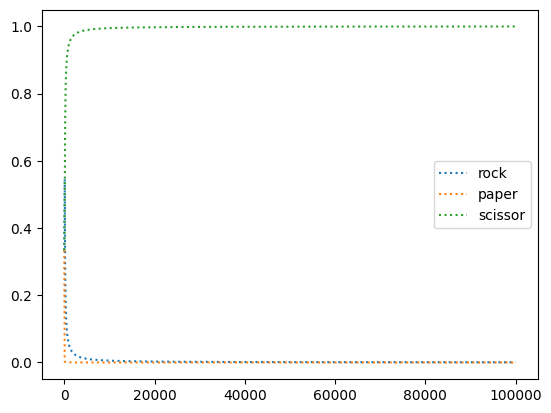

In [14]:
oppStrategy = np.array([0.24141933, 0.4071776 , 0.35140307]) 
rps = RPS_CFRM(oppStrategy)

train(rps, 100000)

print(rps.getAverageStrategy())

plt.plot(x, ry, label = "rock", linestyle=":") 
plt.plot(x, py, label = "paper", linestyle=":") 
plt.plot(x, sy, label = "scissor", linestyle=":") 
plt.legend() 
plt.show()

There is a pure optimal strategy for every mixed strategy. Against a mixed strategy which chooses paper more often, the pure optimal strat is to always pick scissors